In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from time import sleep

import sys
sys.path.insert(1, "/media/data/kaggle/predict-future-sales")
from src import translate

%matplotlib inline

In [184]:
%run -i "../src/read_data.py"

In [3]:
sales_train.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.93585e+06,2.93585e+06,2.93585e+06,2.93585e+06,2.93585e+06
mean,14.5699,33.0017,10197.2,890.853,1.24264
std,9.42299,16.227,6324.3,1729.8,2.61883
min,0,0,0,-1,-22
25%,7,22,4476,249,1
50%,14,31,9343,399,1
75%,23,47,15684,999,1
max,33,59,22169,307980,2169


**item_price** - big standard deviation, negative values (`-1`) and some outliers (e.g. 307980)

**item_cnt_day** - big standard deviation (> twice the mean), negative values (e.g. -22) and some outliers (e.g 2169)

In [4]:
sales_train.isnull().sum(axis=0)

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [10]:
sales_train.sort_values(["date", "date_block_num", "shop_id", "item_id"], inplace=True)

In [11]:
sales_train = sales_train \
    .merge(items, on="item_id", how="left") \
    .merge(item_categories, on="item_category_id", how="left") \
    .merge(shops, on="shop_id", how = "left")

In [12]:
sales_train_by_month = sales_train \
    .groupby(["shop_id", "item_id", sales_train["date"].dt.to_period("M").dt.to_timestamp()]) \
    [["item_price", "item_cnt_day"]] \
    .agg({"item_price": [np.mean, np.median], "item_cnt_day": np.sum}) \
    .reset_index()
sales_train_by_month.columns = ["_".join(col[::-1]).strip("_") for col in sales_train_by_month.columns]
sales_train_by_month.rename({"sum_item_cnt_day": "item_cnt_month"}, axis=1, inplace=True)

In [13]:
sales_train_by_month = sales_train_by_month \
    .merge(items, on="item_id", how="left") \
    .merge(item_categories, on="item_category_id", how="left") \
    .merge(shops, on="shop_id", how = "left")

# Explore shops information

In [14]:
shops

,shop_name,shop_id,shop_name_en
0,"!Якутск Орджоникидзе, 56 фран",0,"! Yakutsk Ordzhonikidze, 56 Franc"
1,"!Якутск ТЦ ""Центральный"" фран",1,"! Yakutsk TC ""Central"" Franc"
2,"Адыгея ТЦ ""Мега""",2,"Adygea TC ""Mega"""
3,"Балашиха ТРК ""Октябрь-Киномир""",3,"Balashikha TRC ""October-Kinomir"""
4,"Волжский ТЦ ""Волга Молл""",4,"Volzhsky mall ""Volga Mall"""
5,"Вологда ТРЦ ""Мармелад""",5,"Vologda SEC ""Marmalade"""
6,"Воронеж (Плехановская, 13)",6,"Voronezh (Plekhanovskaya, 13)"
7,"Воронеж ТРЦ ""Максимир""",7,"Voronezh TRC ""Maksimir"""
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,"Voronezh TRC City-Park ""City"""
9,Выездная Торговля,9,Itinerant trade


`shop_name` seems to be structured so that the City appears first, then is followed by probably some shop type marked with capital letters (TC, SEC, TSC, TK) and finaly the name in the quotation marks.

In [15]:
shops["shop_name"].value_counts()

Воронеж (Плехановская, 13)                         1
Ярославль ТЦ "Альтаир"                             1
Самара ТЦ "ПаркХаус"                               1
Томск ТРЦ "Изумрудный Город"                       1
Химки ТЦ "Мега"                                    1
Балашиха ТРК "Октябрь-Киномир"                     1
Выездная Торговля                                  1
Волжский ТЦ "Волга Молл"                           1
Москва ТЦ "Перловский"                             1
Курск ТЦ "Пушкинский"                              1
Якутск ТЦ "Центральный"                            1
Москва ТЦ "МЕГА Теплый Стан" II                    1
Уфа ТК "Центральный"                               1
Цифровой склад 1С-Онлайн                           1
Красноярск ТЦ "Взлетка Плаза"                      1
Красноярск ТЦ "Июнь"                               1
Вологда ТРЦ "Мармелад"                             1
Воронеж ТРЦ Сити-Парк "Град"                       1
СПб ТК "Сенная"                               

Names are unique, but we can immediately notice that the shops no. 10 and no. 11 are probably the same shop. We'll try to extract features according to the naming structure and then try to find another possible duplicates. We'll do that using original Russian names and translate to English later, as some information might have been lost in translation process.

In [16]:
cities = shops["shop_name"].str.extract("([A-Яa-я]+\\.[A-Яa-я]+)|([A-Яa-я]+)")

In [17]:
cities = cities.iloc[:, 0].fillna(cities.iloc[:, 1])

In [19]:
cities_translation = {}
for city in cities.unique():
    cities_translation[city] = translate.ru_to_en(city)
    sleep(30)

In [20]:
shops["city"] = cities.map(cities_translation)

In [21]:
shops

,shop_name,shop_id,shop_name_en,city
0,"!Якутск Орджоникидзе, 56 фран",0,"! Yakutsk Ordzhonikidze, 56 Franc",Yakutsk
1,"!Якутск ТЦ ""Центральный"" фран",1,"! Yakutsk TC ""Central"" Franc",Yakutsk
2,"Адыгея ТЦ ""Мега""",2,"Adygea TC ""Mega""",Adygea
3,"Балашиха ТРК ""Октябрь-Киномир""",3,"Balashikha TRC ""October-Kinomir""",Balashikha
4,"Волжский ТЦ ""Волга Молл""",4,"Volzhsky mall ""Volga Mall""",Volzhsky
5,"Вологда ТРЦ ""Мармелад""",5,"Vologda SEC ""Marmalade""",Vologda
6,"Воронеж (Плехановская, 13)",6,"Voronezh (Plekhanovskaya, 13)",Voronezh
7,"Воронеж ТРЦ ""Максимир""",7,"Voronezh TRC ""Maksimir""",Voronezh
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,"Voronezh TRC City-Park ""City""",Voronezh
9,Выездная Торговля,9,Itinerant trade,exit


In [22]:
shops.loc[shops["city"].isin(["Digital", "the Internet", "exit", "Czechs", "SPb"])]

,shop_name,shop_id,shop_name_en,city
9,Выездная Торговля,9,Itinerant trade,exit
12,Интернет-магазин ЧС,12,Shop Online Emergencies,the Internet
42,"СПб ТК ""Невский Центр""",42,"St. Petersburg TK ""Nevsky Center""",SPb
43,"СПб ТК ""Сенная""",43,"St. Petersburg TK ""Sennaya""",SPb
55,Цифровой склад 1С-Онлайн,55,Digital storage 1C-line,Digital
56,"Чехов ТРЦ ""Карнавал""",56,"Czechs SEC ""Carnival""",Czechs


In [23]:
shops.loc[shops["city"] == "Czechs", "city"] = "Chekhov"
shops.loc[shops["city"] == "the Internet", "city"] = "Online"
shops.loc[shops["city"] == "exit", "city"] = "Door-to-door sales"
shops.loc[shops["city"] == "SPb", "city"] = "St. Petersburg"

In [24]:
shops

,shop_name,shop_id,shop_name_en,city
0,"!Якутск Орджоникидзе, 56 фран",0,"! Yakutsk Ordzhonikidze, 56 Franc",Yakutsk
1,"!Якутск ТЦ ""Центральный"" фран",1,"! Yakutsk TC ""Central"" Franc",Yakutsk
2,"Адыгея ТЦ ""Мега""",2,"Adygea TC ""Mega""",Adygea
3,"Балашиха ТРК ""Октябрь-Киномир""",3,"Balashikha TRC ""October-Kinomir""",Balashikha
4,"Волжский ТЦ ""Волга Молл""",4,"Volzhsky mall ""Volga Mall""",Volzhsky
5,"Вологда ТРЦ ""Мармелад""",5,"Vologda SEC ""Marmalade""",Vologda
6,"Воронеж (Плехановская, 13)",6,"Voronezh (Plekhanovskaya, 13)",Voronezh
7,"Воронеж ТРЦ ""Максимир""",7,"Voronezh TRC ""Maksimir""",Voronezh
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,"Voronezh TRC City-Park ""City""",Voronezh
9,Выездная Торговля,9,Itinerant trade,Door-to-door sales


In [25]:
shops["shop_type"] = shops["shop_name"].str.extract("([A-Я]{2,})")

In [26]:
shops["shop_type"].unique()

array([nan, 'ТЦ', 'ТРК', 'ТРЦ', 'ЧС', 'МТРЦ', 'ТК', 'СП'], dtype=object)

In [28]:
shop_types_translation = {}
for shop_type in shops["shop_type"].unique():
    shop_types_translation[city] = translate.ru_to_en(shop_type)
    sleep(30)

In [29]:
shops["name_only"] = shops["shop_name"].str.extract('"(.*?)"')

In [30]:
possible_duplicates = shops[["city", "shop_type", "name_only"]].fillna("None").groupby(["city", "shop_type", "name_only"]).size().sort_values(ascending=False)
possible_duplicates[possible_duplicates > 1]

city           shop_type  name_only         
Zhukovsky      None       None                  2
Yakutsk        ТЦ         Центральный           2
               None       None                  2
Rostov-on-Don  ТРК        Мегацентр Горизонт    2
Moscow         ТК         Буденовский           2
dtype: int64

There are 5 possible duplicates. 

In [31]:
shops_text_nans = shops.fillna("None")
shops.loc[(shops["city"] == "Zhukovsky") & (shops_text_nans["shop_type"] == "None") & (shops_text_nans["name_only"] == "None")]

,shop_name,shop_id,shop_name_en,city,shop_type,name_only
10,Жуковский ул. Чкалова 39м?,10,Zhukovsky Street. Chkalov 39m?,Zhukovsky,NaN,NaN
11,Жуковский ул. Чкалова 39м²,11,Zhukovsky Street. Chkalov 39m²,Zhukovsky,NaN,NaN


In [32]:
sales_train_by_month.loc[sales_train_by_month["shop_id"].isin([10, 11])].groupby("date").apply(lambda x: x["shop_id"].unique())

date
2013-01-01    [10]
2013-02-01    [10]
2013-03-01    [10]
2013-04-01    [10]
2013-05-01    [10]
2013-06-01    [10]
2013-07-01    [10]
2013-08-01    [10]
2013-09-01    [10]
2013-10-01    [10]
2013-11-01    [10]
2013-12-01    [10]
2014-01-01    [10]
2014-02-01    [10]
2014-03-01    [10]
2014-04-01    [10]
2014-05-01    [10]
2014-06-01    [10]
2014-07-01    [10]
2014-08-01    [10]
2014-09-01    [10]
2014-10-01    [10]
2014-11-01    [10]
2014-12-01    [10]
2015-01-01    [10]
2015-02-01    [11]
2015-03-01    [10]
2015-04-01    [10]
2015-05-01    [10]
2015-06-01    [10]
2015-07-01    [10]
2015-08-01    [10]
2015-09-01    [10]
2015-10-01    [10]
dtype: object

Shops no. 10 and no. 11 are definitely the same shop, with just the typo in a name in one month.

In [33]:
shops.loc[(shops["city"] == "Yakutsk") & (shops["shop_type"] == "ТЦ") & (shops["name_only"] == "Центральный")]

,shop_name,shop_id,shop_name_en,city,shop_type,name_only
1,"!Якутск ТЦ ""Центральный"" фран",1,"! Yakutsk TC ""Central"" Franc",Yakutsk,ТЦ,Центральный
58,"Якутск ТЦ ""Центральный""",58,"Yakutsk TC ""Central""",Yakutsk,ТЦ,Центральный


In [34]:
sales_train_by_month.loc[sales_train_by_month["shop_id"].isin([1, 58])].groupby("date").apply(lambda x: x["shop_id"].unique())

date
2013-01-01     [1]
2013-02-01     [1]
2013-03-01    [58]
2013-04-01    [58]
2013-05-01    [58]
2013-06-01    [58]
2013-07-01    [58]
2013-08-01    [58]
2013-09-01    [58]
2013-10-01    [58]
2013-11-01    [58]
2013-12-01    [58]
2014-01-01    [58]
2014-02-01    [58]
2014-03-01    [58]
2014-04-01    [58]
2014-05-01    [58]
2014-06-01    [58]
2014-07-01    [58]
2014-08-01    [58]
2014-09-01    [58]
2014-10-01    [58]
2014-11-01    [58]
2014-12-01    [58]
2015-01-01    [58]
2015-02-01    [58]
2015-03-01    [58]
2015-04-01    [58]
2015-05-01    [58]
2015-06-01    [58]
2015-07-01    [58]
2015-08-01    [58]
2015-09-01    [58]
2015-10-01    [58]
dtype: object

Shop no. 1 probably became shop no. 58 after two months. The name is almost the same; I'm not sure what "Franc" at the end of original name means (maybe an abbreviation from "franchise"), but I believe there is a high chance that this is exactly the same shop, or with some slight change.

In [35]:
shops.loc[(shops["city"] == "Yakutsk") & (shops_text_nans["shop_type"] == "None") & (shops_text_nans["name_only"] == "None")]

,shop_name,shop_id,shop_name_en,city,shop_type,name_only
0,"!Якутск Орджоникидзе, 56 фран",0,"! Yakutsk Ordzhonikidze, 56 Franc",Yakutsk,NaN,NaN
57,"Якутск Орджоникидзе, 56",57,"Yakutsk Ordzhonikidze, 56",Yakutsk,NaN,NaN


In [36]:
sales_train_by_month.loc[sales_train_by_month["shop_id"].isin([0, 57])].groupby("date").apply(lambda x: x["shop_id"].unique())

date
2013-01-01     [0]
2013-02-01     [0]
2013-03-01    [57]
2013-04-01    [57]
2013-05-01    [57]
2013-06-01    [57]
2013-07-01    [57]
2013-08-01    [57]
2013-09-01    [57]
2013-10-01    [57]
2013-11-01    [57]
2013-12-01    [57]
2014-01-01    [57]
2014-02-01    [57]
2014-03-01    [57]
2014-04-01    [57]
2014-05-01    [57]
2014-06-01    [57]
2014-07-01    [57]
2014-08-01    [57]
2014-09-01    [57]
2014-10-01    [57]
2014-11-01    [57]
2014-12-01    [57]
2015-01-01    [57]
2015-02-01    [57]
2015-03-01    [57]
2015-04-01    [57]
2015-05-01    [57]
2015-06-01    [57]
2015-07-01    [57]
2015-08-01    [57]
2015-09-01    [57]
2015-10-01    [57]
dtype: object

The same as above, I'll assume that this is the same shop.

In [37]:
shops.loc[(shops["city"] == "Rostov-on-Don") & (shops["shop_type"] == "ТРК") & (shops["name_only"] == "Мегацентр Горизонт")]

,shop_name,shop_id,shop_name_en,city,shop_type,name_only
39,"РостовНаДону ТРК ""Мегацентр Горизонт""",39,"RostovNaDonu TRC ""Megacenter Horizon""",Rostov-on-Don,ТРК,Мегацентр Горизонт
40,"РостовНаДону ТРК ""Мегацентр Горизонт"" Островной",40,"RostovNaDonu TRC ""Megacenter Horizon"" Island",Rostov-on-Don,ТРК,Мегацентр Горизонт


In [38]:
sales_train_by_month.loc[sales_train_by_month["shop_id"].isin([39, 40])].groupby("date").apply(lambda x: x["shop_id"].unique())

date
2014-03-01    [39, 40]
2014-04-01    [39, 40]
2014-05-01    [39, 40]
2014-06-01    [39, 40]
2014-07-01    [39, 40]
2014-08-01    [39, 40]
2014-09-01    [39, 40]
2014-10-01    [39, 40]
2014-11-01    [39, 40]
2014-12-01    [39, 40]
2015-01-01    [39, 40]
2015-02-01        [39]
2015-03-01        [39]
2015-04-01        [39]
2015-05-01        [39]
2015-06-01        [39]
2015-07-01        [39]
2015-08-01        [39]
2015-09-01        [39]
2015-10-01        [39]
dtype: object

In [39]:
shops.loc[(shops["city"] == "Moscow") & (shops["shop_type"] == "ТК") & (shops["name_only"] == "Буденовский")]

,shop_name,shop_id,shop_name_en,city,shop_type,name_only
23,"Москва ТК ""Буденовский"" (пав.А2)",23,"Moscow TK ""Budenovsky"" (pav.A2)",Moscow,ТК,Буденовский
24,"Москва ТК ""Буденовский"" (пав.К7)",24,"Moscow TK ""Budenovsky"" (pav.K7)",Moscow,ТК,Буденовский


In [40]:
sales_train_by_month.loc[sales_train_by_month["shop_id"].isin([23, 24])].groupby("date").apply(lambda x: x["shop_id"].unique())

date
2013-01-01    [23, 24]
2013-02-01    [23, 24]
2013-03-01    [23, 24]
2013-04-01    [23, 24]
2013-05-01        [24]
2013-06-01        [24]
2013-07-01        [24]
2013-08-01        [24]
2013-09-01        [24]
2013-10-01        [24]
2013-11-01        [24]
2013-12-01        [24]
2014-01-01        [24]
2014-02-01        [24]
2014-03-01        [24]
2014-04-01        [24]
2014-05-01        [24]
2014-06-01        [24]
2014-07-01        [24]
2014-08-01        [24]
2014-09-01        [24]
2014-10-01        [24]
2014-11-01        [24]
2014-12-01        [24]
2015-01-01        [24]
2015-02-01        [24]
2015-03-01        [24]
2015-04-01        [24]
2015-05-01        [24]
2015-06-01        [24]
2015-07-01        [24]
2015-08-01        [24]
2015-09-01        [24]
2015-10-01        [24]
dtype: object

With shops no. 39 and 40 or no. 23 and 24 the situation is different, those shops were probably different POS in the same location.

We create a new `shop_id`, leaving the old one as it is - we'll check later which way gives the better model performance.

In [41]:
shops["shop_id_new"] = shops["shop_id"]
shops.loc[shops["shop_id"] == 11, "shop_id_new"] = 10
shops.loc[shops["shop_id"] == 57, "shop_id_new"] = 0
shops.loc[shops["shop_id"] == 58, "shop_id_new"] = 1

# Explore item categories

In [42]:
pd.options.display.max_rows=None

In [43]:
item_categories

,item_category_name,item_category_id,item_category_name_en
0,PC - Гарнитуры/Наушники,0,PC - Headsets / Headphones
1,Аксессуары - PS2,1,Accessories - PS2
2,Аксессуары - PS3,2,Accessories - PS3
3,Аксессуары - PS4,3,Accessories - PS4
4,Аксессуары - PSP,4,Accessories - PSP
5,Аксессуары - PSVita,5,Accessories - PSVita
6,Аксессуары - XBOX 360,6,Accessories - XBOX 360
7,Аксессуары - XBOX ONE,7,Accessories - XBOX ONE
8,Билеты (Цифра),8,Tickets (digits)
9,Доставка товара,9,Delivery of goods


There are two categories for tickets (no. 8 and 80), probably one for digital tickets and one for standard paper tickets, but let's make sure that the one didn't replace another at some point.

In [44]:
sales_train_by_month.loc[sales_train_by_month["item_category_id"].isin([8, 80])].groupby("date").apply(lambda x: x["item_category_id"].unique())

date
2014-07-01        [8]
2014-08-01        [8]
2014-09-01        [8]
2014-10-01        [8]
2015-04-01    [80, 8]
2015-05-01    [80, 8]
2015-06-01    [80, 8]
2015-07-01    [80, 8]
2015-08-01    [80, 8]
2015-09-01    [80, 8]
2015-10-01        [8]
dtype: object

No, it's not the case - they're certainly two separate, although similar categories.

In [45]:
item_categories["item_supcategory_name"] = item_categories["item_category_name"].str.extract("(^[^-]*[^ -])")

In [46]:
item_categories

,item_category_name,item_category_id,item_category_name_en,item_supcategory_name
0,PC - Гарнитуры/Наушники,0,PC - Headsets / Headphones,PC
1,Аксессуары - PS2,1,Accessories - PS2,Аксессуары
2,Аксессуары - PS3,2,Accessories - PS3,Аксессуары
3,Аксессуары - PS4,3,Accessories - PS4,Аксессуары
4,Аксессуары - PSP,4,Accessories - PSP,Аксессуары
5,Аксессуары - PSVita,5,Accessories - PSVita,Аксессуары
6,Аксессуары - XBOX 360,6,Accessories - XBOX 360,Аксессуары
7,Аксессуары - XBOX ONE,7,Accessories - XBOX ONE,Аксессуары
8,Билеты (Цифра),8,Tickets (digits),Билеты (Цифра)
9,Доставка товара,9,Delivery of goods,Доставка товара


In [47]:
item_categories.loc[item_categories["item_supcategory_name"] == "Карты оплаты (Кино, Музыка, Игры)", "item_supcategory_name"] = "Карты оплаты"
item_categories.loc[item_categories["item_supcategory_name"] == "Чистые носители (шпиль)", "item_supcategory_name"] = "Чистые носители"
item_categories.loc[item_categories["item_supcategory_name"] == "Чистые носители (штучные)", "item_supcategory_name"] = "Чистые носители"

In [48]:
item_categories["item_subcategory_name"] = item_categories["item_category_name"].str.extract("([^ -][^-]*$)")

In [49]:
item_categories

,item_category_name,item_category_id,item_category_name_en,item_supcategory_name,item_subcategory_name
0,PC - Гарнитуры/Наушники,0,PC - Headsets / Headphones,PC,Гарнитуры/Наушники
1,Аксессуары - PS2,1,Accessories - PS2,Аксессуары,PS2
2,Аксессуары - PS3,2,Accessories - PS3,Аксессуары,PS3
3,Аксессуары - PS4,3,Accessories - PS4,Аксессуары,PS4
4,Аксессуары - PSP,4,Accessories - PSP,Аксессуары,PSP
5,Аксессуары - PSVita,5,Accessories - PSVita,Аксессуары,PSVita
6,Аксессуары - XBOX 360,6,Accessories - XBOX 360,Аксессуары,XBOX 360
7,Аксессуары - XBOX ONE,7,Accessories - XBOX ONE,Аксессуары,XBOX ONE
8,Билеты (Цифра),8,Tickets (digits),Билеты (Цифра),Билеты (Цифра)
9,Доставка товара,9,Delivery of goods,Доставка товара,Доставка товара


In [50]:
pd.options.display.max_rows = 60

# Explore items

In [51]:
items.sample(frac=1).head(60)

,item_name,item_id,item_category_id,item_name_en
15844,НЮША Объединение CD+DVD (фирм.),15844,55,НЮША Объединение CD+DVD (фирм.)
21760,ЧУЖОЙ. АНТОЛОГИЯ (2014),21760,41,STRANGER. ANTHOLOGY (2014)
8879,БИБЛИОТЕКА ВСЕМИРНОЙ ЛИТЕРАТУРЫ. ТОМ 3 (КОЛЛ. ...,8879,41,Library of World Literature. VOLUME 3 (coll. 9...
2535,DEEP PURPLE Now What?! 2LP,2535,58,DEEP PURPLE Now What?! 2LP
13553,Копия Nightmare On Elm Street 3 Dream Warriors...,13553,61,Копия Nightmare On Elm Street 3 Dream Warriors...
8098,АВАТАР. КНИГА 1. ВОДА. ВЫПУСК 2,8098,40,AVATAR. BOOK 1 WATER. NUMBER 2
18837,СМЕШАРИКИ НОВЫЕ ПРИКЛЮЧЕНИЯ Новогодний эфир,18837,40,СМЕШАРИКИ НОВЫЕ ПРИКЛЮЧЕНИЯ Новогодний эфир
7471,V/A Top 100 DJ 5 4CD (digibook),7471,55,V/A Top 100 DJ 5 4CD (digibook)
17582,ПЯТЬДЕСЯТ ОТТЕНКОВ СЕРОГО (BD),17582,37,FIFTY grayscale (BD)
11200,ДОСТУЧАТЬСЯ ДО НЕБЕС (регион),11200,40,Knockin 'on Heaven (region)


Apart from the item name, there are some additional features stored in square and round brackets (e.g. game platform or language etc.). The name structure indicates that those features are somehow related (i.e. the characteristics put in square brackets are some categories). Also, we often have many characteristics on the same level (either two square brackets or multiple values separated by a comma within the same square bracket).

In [185]:
items["item_feature1"] = items["item_name"] \
    .str.lower() \
    .str.extractall("\[(.*?)\]") \
    [0] \
    .str.split(",") \
    .groupby(level=0) \
    .apply(lambda l: [item.strip() for sublist in l for item in sublist])

In [201]:
items["item_feature1"].explode().value_counts()

pc                             2486
цифровая версия                1921
русская версия                 1129
ps3                             609
jewel                           538
xbox 360                        463
русские субтитры                397
английская версия               336
русская документация            283
ps4                             173
xbox one                        124
psp                             116
ps vita                          79
pс                               64
mac                              16
рс                               14
цифровая версия epay             13
pc-cd                            13
jewel русская версия              9
только для kinect                 9
pc/mac                            5
xbox360                           4
[pc                               4
mac цифровая версия               4
android                           3
30 дней                           3
x360                              3
14 дней                     

In [206]:
items["item_feature2"] = items["item_name"] \
    .str.lower() \
    .str.extractall("\((.*?)\)") \
    [0] \
    .str.split(",") \
    .groupby(level=0) \
    .apply(lambda l: [item.strip() for sublist in l for item in sublist])

In [210]:
items["item_feature2"].explode().value_counts()

регион                                                                      1839
bd                                                                          1706
jewel                                                                        818
mp3-cd                                                                       774
фирм.                                                                        714
digipack                                                                     513
3d bd                                                                        213
rem                                                                          173
essentials                                                                   164
dvd-box                                                                      111
3d bd+bd                                                                      90
дополнение                                                                    90
box                         

In [160]:
items["item_feature3"] = items["item_name"].str.lower().str.extract("(^[^\(\[]*[^ \(\[])")

In [182]:
items["item_feature3"].value_counts(dropna=False).head(20)

мтг                                             28
disney. infinity 2.0                            21
комплект «sony ps3 super slim                   16
skylanders swap force. интерактивная фигурка    13
хоббит: нежданное путешествие                   11
grand theft auto v                              10
комплект «sony ps3                              10
секреты проф.работы с 1с:бух.8                  10
тачки 2                                          9
battlefield 4                                    9
хоббит: пустошь смауга                           9
приключения тинтина: тайна единорога             9
need for speed rivals                            9
rayman legends                                   8
need for speed: most wanted                      8
lego хоббит                                      7
south park: палка истины                         7
fifa 14                                          7
evil within                                      7
fifa 12                        

Low count feature - won't be probably useful in this form.

Generally, it feels that much more can be extracted from `item_name`. Maybe some pre-trained embeddings would be worth to try later.

# Explore the training set and test set

In [53]:
sales_train_by_month = sales_train_by_month.merge(test, how="left", on=["shop_id", "item_id"])

In [54]:
(sales_train_by_month.loc[sales_train_by_month["ID"].isnull(), ["shop_id", "item_id"]].drop_duplicates().shape[0] /
 sales_train_by_month[["shop_id", "item_id"]].drop_duplicates().shape[0])

0.7373315351170884

Almost 74% of (`shop_id`, `item_id`) combinations present in training data are absent in test data. However, these may still be useful for the model.

In [55]:
train_pairs = sales_train[["shop_id", "item_id"]].drop_duplicates()
train_pairs["set"] = "train"

In [56]:
test.merge(train_pairs, how="left", on=["shop_id", "item_id"])["set"].value_counts(dropna=False, normalize=True)

train    0.520093
NaN      0.479907
Name: set, dtype: float64

About 48% of pairs from the test set doesn't appear in the training set! We'll have a hard task with predicting for them, but we can probably lean back a little on global statistics for either `shop_id` or `item_id`

In [57]:
len(set(test["shop_id"]).difference(set(sales_train["shop_id"])))

0

In [58]:
len(set(test["item_id"]).difference(set(sales_train["item_id"])))

363

There are no new shops in test set, but there are 363 new items! We can try use some constant prediction for them (like mean or median) or use global statistics for the particular shop.

# Big picture

In [59]:
item_cnt_day_agg = sales_train.groupby("date")["item_cnt_day"].sum()

In [60]:
item_cnt_day_agg_smoothed = item_cnt_day_agg.rolling(window=7).mean()

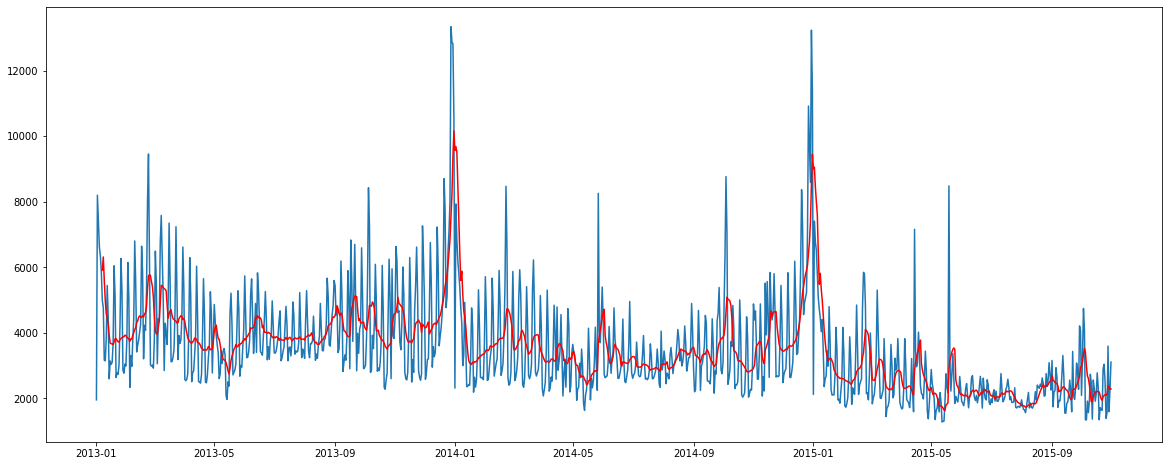

In [61]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(item_cnt_day_agg)
ax.plot(item_cnt_day_agg_smoothed, c="red")

In [62]:
item_cnt_month_agg = sales_train_by_month.groupby("date")["item_cnt_month"].sum()

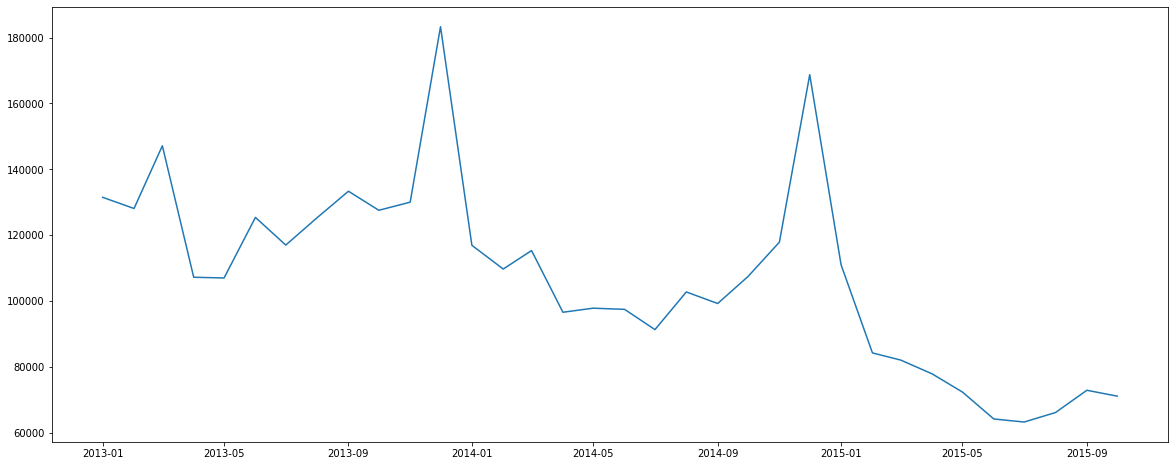

In [63]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(item_cnt_month_agg)

In [64]:
item_cnt_month_agg = item_cnt_month_agg.reset_index()
item_cnt_month_agg["year"] = item_cnt_month_agg["date"].dt.year
item_cnt_month_agg["month"] = item_cnt_month_agg["date"].dt.month

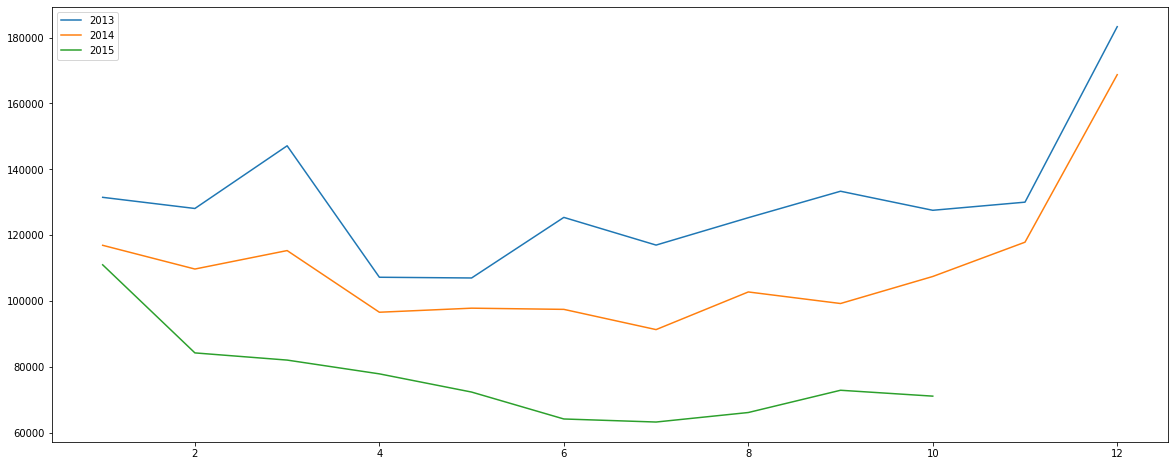

In [65]:
fig, ax = plt.subplots(figsize=(20, 8))
for year in item_cnt_month_agg["year"].unique():
    ax.plot(item_cnt_month_agg.loc[item_cnt_month_agg["year"] == year, "month"], item_cnt_month_agg.loc[item_cnt_month_agg["year"] == year, "item_cnt_month"], label=year)
ax.legend()

The negative trend is apparent, with some seasonal peaks in March and December.

In [68]:
sales_train_by_month.describe(include="all")

,shop_id,item_id,date,mean_item_price,median_item_price,item_cnt_month,item_name,item_category_id,item_name_en,item_category_name,item_category_name_en,shop_name,shop_name_en,ID
count,1.609124e+06,1.609124e+06,1609124,1.609124e+06,1.609124e+06,1.609124e+06,1609124,1.609124e+06,1609124,1609124,1609124,1609124,1609124,600159.000000
unique,NaN,NaN,34,NaN,NaN,NaN,21807,NaN,21793,84,84,60,60,NaN
top,NaN,NaN,2013-12-01 00:00:00,NaN,NaN,NaN,Playstation Store пополнение бумажника: Карта ...,NaN,Playstation Store replenishment wallet: Map pa...,Кино - DVD,Movie - DVD,"Москва ТЦ ""Семеновский""","Moscow shopping center ""Semyonov""",NaN
freq,NaN,NaN,66276,NaN,NaN,NaN,1452,NaN,1452,336088,336088,99241,99241,NaN
first,NaN,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.280585e+01,1.068099e+04,NaN,7.897548e+02,7.893331e+02,2.267200e+00,NaN,4.154192e+01,NaN,NaN,NaN,NaN,NaN,98547.617800
std,1.653701e+01,6.238883e+03,NaN,1.552415e+03,1.553203e+03,8.649882e+00,NaN,1.632365e+01,NaN,NaN,NaN,NaN,NaN,58056.620163
min,0.000000e+00,0.000000e+00,NaN,9.000000e-02,9.000000e-02,-2.200000e+01,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2.100000e+01,5.045000e+03,NaN,1.990000e+02,1.990000e+02,1.000000e+00,NaN,3.000000e+01,NaN,NaN,NaN,NaN,NaN,49329.000000


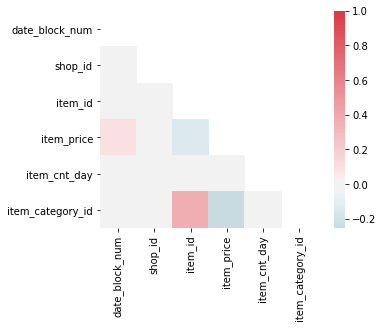

In [69]:
corr = sales_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, center=0)

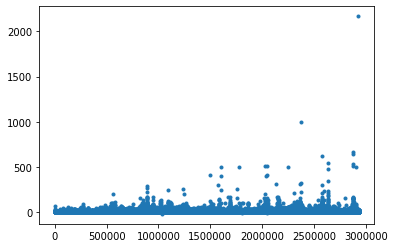

In [71]:
plt.plot(sales_train['item_cnt_day'], '.')

In [72]:
test_sample = test.sample(frac=0.01)
sales_train_by_month_sample = sales_train_by_month.sample(frac=0.01)

Text(0, 0.5, 'item_id')

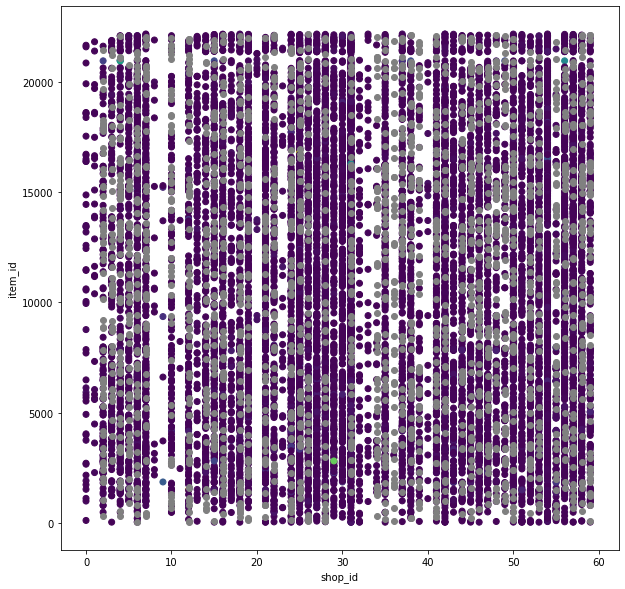

In [80]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(sales_train_by_month_sample["shop_id"], sales_train_by_month_sample["item_id"], 
           c=sales_train_by_month_sample["item_cnt_month"])
ax.scatter(test_sample["shop_id"], test_sample["item_id"], c="gray")
ax.set_xlabel("shop_id")
ax.set_ylabel("item_id")

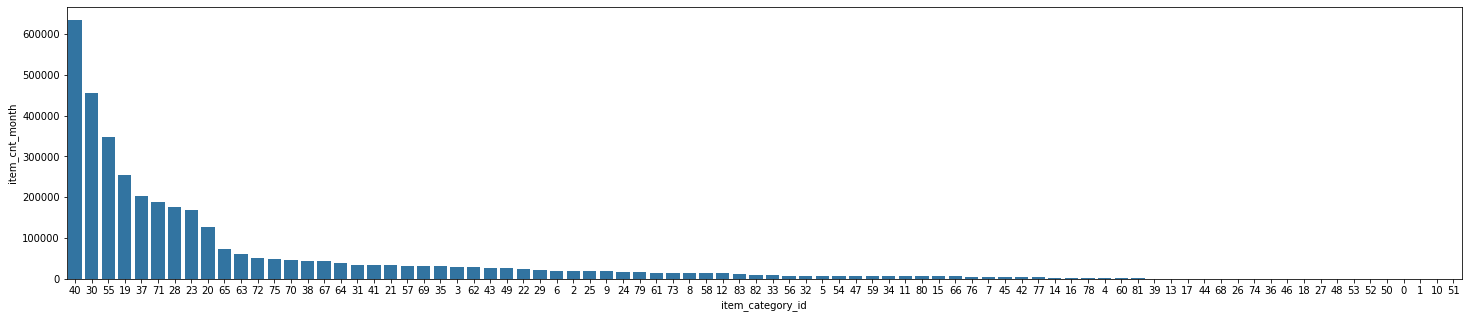

In [81]:
item_cnt_by_category_id = sales_train_by_month.groupby("item_category_id")["item_cnt_month"].sum().reset_index().sort_values("item_cnt_month", ascending=False)
fig, ax = plt.subplots(figsize = (25, 5))
sns.barplot(x='item_category_id', y="item_cnt_month", data=item_cnt_by_category_id, order=item_cnt_by_category_id["item_category_id"], color="#1f77b4")

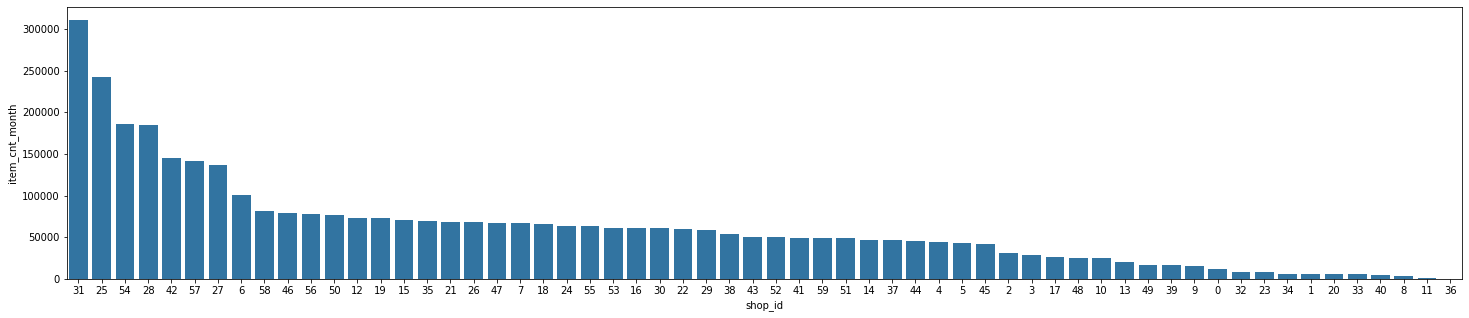

In [82]:
item_cnt_by_shop_id = sales_train_by_month.groupby("shop_id")["item_cnt_month"].sum().reset_index().sort_values("item_cnt_month", ascending=False)
fig, ax = plt.subplots(figsize = (25, 5))
sns.barplot(x="shop_id", y="item_cnt_month", data=item_cnt_by_shop_id, order=item_cnt_by_shop_id["shop_id"], color="#1f77b4")

# Explore item counts

In [83]:
(sales_train["item_cnt_day"] == 0).value_counts(normalize=True)

False    1.0
Name: item_cnt_day, dtype: float64

Training data don't consist explicit 0 - if there were no sales on the day, the row is absent.

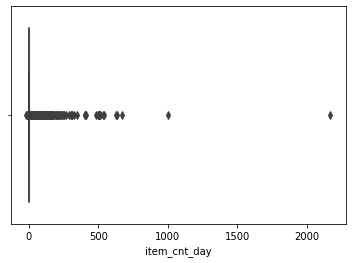

In [84]:
sns.boxplot(sales_train["item_cnt_day"])

In [85]:
sales_train \
    .sort_values("item_cnt_day", ascending=False) \
    .head(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_name_en,item_category_name,item_category_name_en,shop_name,shop_name_en
2928870,2015-10-28,33,12,11373,0.908714,2169,Доставка до пункта выдачи (Boxberry),9,Delivery to the delivery point (Boxberry),Доставка товара,Delivery of goods,Интернет-магазин ЧС,Shop Online Emergencies
2371900,2015-01-15,24,12,20949,4.000000,1000,Фирменный пакет майка 1С Интерес белый (34*42)...,71,Corporate package white shirt 1C Interest (34 ...,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mats d / mouse",Интернет-магазин ЧС,Shop Online Emergencies
2881273,2015-09-30,32,12,9248,1692.526123,669,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) [...",80,"Ticket ""IgroMir 2015"" - October 3, 2015 (site)...",Служебные - Билеты,Utilities - Tickets,Интернет-магазин ЧС,Shop Online Emergencies
2882183,2015-09-30,32,55,9249,1702.825806,637,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) У...",8,"Ticket ""IgroMir 2015"" - October 3, 2015 (websi...",Билеты (Цифра),Tickets (digits),Цифровой склад 1С-Онлайн,Digital storage 1C-line
2578693,2015-04-14,27,12,3731,1904.548096,624,"Grand Theft Auto V [PC, русские субтитры]",30,"Grand Theft Auto V [PC, Russian subtitles]",Игры PC - Стандартные издания,Games PC - Standard Edition,Интернет-магазин ЧС,Shop Online Emergencies
2640163,2015-05-19,28,12,11373,155.192947,539,Доставка до пункта выдачи (Boxberry),9,Delivery to the delivery point (Boxberry),Доставка товара,Delivery of goods,Интернет-магазин ЧС,Shop Online Emergencies
2880957,2015-09-29,32,55,9249,1500.000000,533,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) У...",8,"Ticket ""IgroMir 2015"" - October 3, 2015 (websi...",Билеты (Цифра),Tickets (digits),Цифровой склад 1С-Онлайн,Digital storage 1C-line
2029352,2014-10-02,21,12,9242,1500.000000,512,"Билет ""ИгроМир 2014"" (на один день (отдельно -...",8,"Билет ""ИгроМир 2014"" (на один день (отдельно -...",Билеты (Цифра),Tickets (digits),Интернет-магазин ЧС,Shop Online Emergencies
2051782,2014-10-09,21,55,19437,899.000000,508,"Средиземье: Тени Мордора [PC, Цифровая версия]",31,"Middle-earth: Shadow of Mordor [PC, Digital Ve...",Игры PC - Цифра,Games PC - Digital,Цифровой склад 1С-Онлайн,Digital storage 1C-line
2879875,2015-09-29,32,12,9248,1500.000000,504,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) [...",80,"Ticket ""IgroMir 2015"" - October 3, 2015 (site)...",Служебные - Билеты,Utilities - Tickets,Интернет-магазин ЧС,Shop Online Emergencies


In [86]:
sales_train \
    .sort_values("item_cnt_day", ascending=False).head(20) \
    [["item_name", "item_name_en", "item_category_name", "item_category_name_en"]] \
    .drop_duplicates()

,item_name,item_name_en,item_category_name,item_category_name_en
2928870,Доставка до пункта выдачи (Boxberry),Delivery to the delivery point (Boxberry),Доставка товара,Delivery of goods
2371900,Фирменный пакет майка 1С Интерес белый (34*42)...,Corporate package white shirt 1C Interest (34 ...,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mats d / mouse"
2881273,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) [...","Ticket ""IgroMir 2015"" - October 3, 2015 (site)...",Служебные - Билеты,Utilities - Tickets
2882183,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) У...","Ticket ""IgroMir 2015"" - October 3, 2015 (websi...",Билеты (Цифра),Tickets (digits)
2578693,"Grand Theft Auto V [PC, русские субтитры]","Grand Theft Auto V [PC, Russian subtitles]",Игры PC - Стандартные издания,Games PC - Standard Edition
2029352,"Билет ""ИгроМир 2014"" (на один день (отдельно -...","Билет ""ИгроМир 2014"" (на один день (отдельно -...",Билеты (Цифра),Tickets (digits)
2051782,"Средиземье: Тени Мордора [PC, Цифровая версия]","Middle-earth: Shadow of Mordor [PC, Digital Ve...",Игры PC - Цифра,Games PC - Digital
1605187,iTunes 1500 руб.,iTunes 1500 rubles.,"Карты оплаты (Кино, Музыка, Игры)","Payment card (Movies, Music, Games)"
2640152,"Ведьмак 3: Дикая охота [PC, русская версия]","The Witcher 3: Wild Hunt [PC, Russian version]",Игры PC - Дополнительные издания,Games PC - Additional publications
2051783,"Средиземье: Тени Мордора. Premium Edition [PC,...",Middle-earth: Shadow of Mordor. Premium Editio...,Игры PC - Цифра,Games PC - Digital


- The top outlier seems to be some paid delivery service. The second top is the bag. 
- The 3rd, 4th, 7th, 8th, 10th rows are the tickets for the same event (in two consecutive years) - IgroMir - which is some large-scale annual exhibition of computer and video games in Russia which in years 2013-2015 was held in October (tickets were probably sold much earlier). 
- The other daily outliers were computer games (GTA, Middle-earth: Shadow of Mordor, The Witcher 3: Wild Hunt), iTunes payment card and Delivery Service (in Moscow only). This indicates that the number of items sold can vary according to some periodic (like IgroMir) or non-periodic events like the release of a popular computer game.

/home/kuba/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


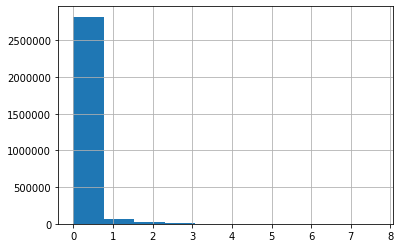

In [87]:
np.log(sales_train["item_cnt_day"]).hist()

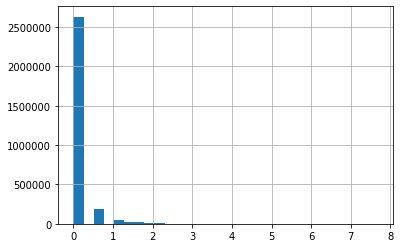

In [88]:
np.log(sales_train["item_cnt_day"]).hist(bins = 30)

In [89]:
sales_train_by_month["item_cnt_cumsum"] = sales_train_by_month \
    .sort_values("date") \
    .groupby("item_id") \
    ["item_cnt_month"] \
    .cumsum()

In [90]:
df_item_cnt_cumsum = sales_train_by_month \
    .groupby(["date", "item_id"]) \
    ["item_cnt_month"] \
    .sum() \
    .groupby("item_id") \
    .cumsum() \
    .reset_index()

Text(0, 0.5, 'Cumulative sum of items sold')

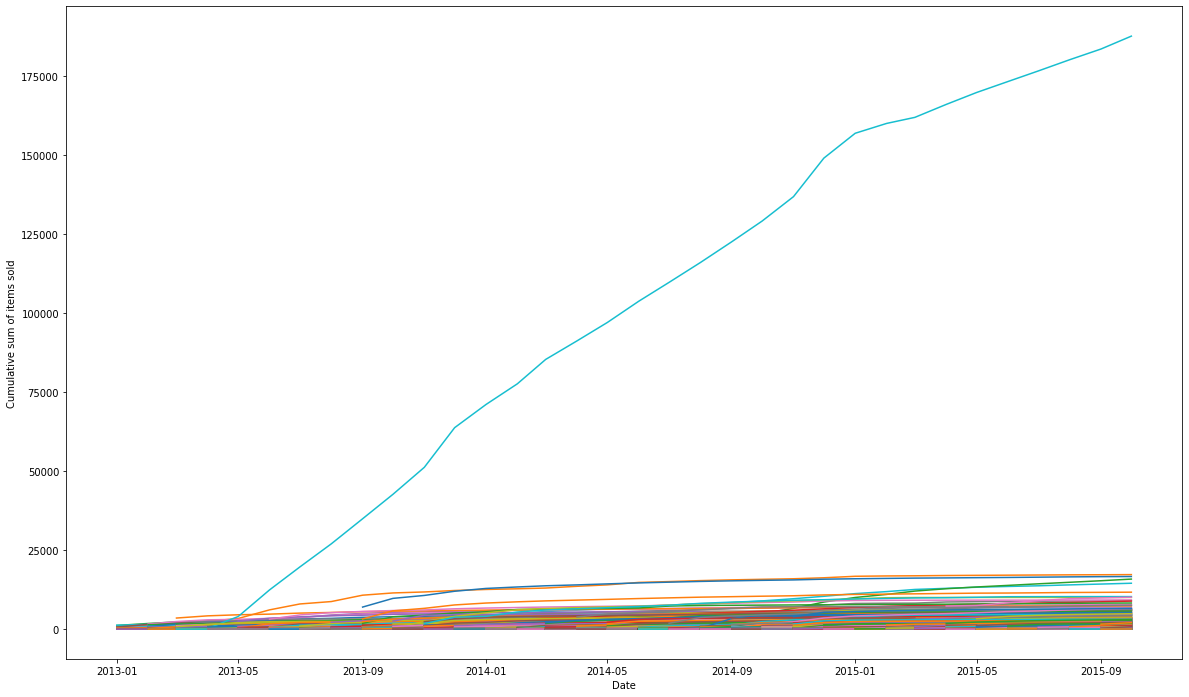

In [91]:
fig, ax = plt.subplots(figsize=(20, 12))
for i in df_item_cnt_cumsum["item_id"].unique():
    ax.plot(df_item_cnt_cumsum.loc[df_item_cnt_cumsum["item_id"] == i, "date"], 
            df_item_cnt_cumsum.loc[df_item_cnt_cumsum["item_id"] == i, "item_cnt_month"],
            label=i)
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative sum of items sold")

There's two things that strikes immedietaly from the plot:

- There's one item that is sold predominantly (however, its predicted value be clipped to 20 anyway)
- There are plenty of items that are no more in sold (apparent steady line at the end)

In [92]:
df_item_cnt_cumsum.loc[df_item_cnt_cumsum["item_cnt_month"] == df_item_cnt_cumsum["item_cnt_month"].max(),
                       "item_id"]

233589    20949
Name: item_id, dtype: int64

In [93]:
items.loc[items["item_id"] == 20949, "item_name"].values

array(['Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм'],
      dtype=object)

According to google translator this item is just a branded plastic bag, which makes total sense as it's probably sold almost with every order.

In [94]:
df_shop_cnt_cumsum = sales_train_by_month.groupby(["date", "shop_id"])["item_cnt_month"].sum().groupby("shop_id").cumsum().reset_index()

Text(0, 0.5, 'Cumulative sum of items sold by shop')

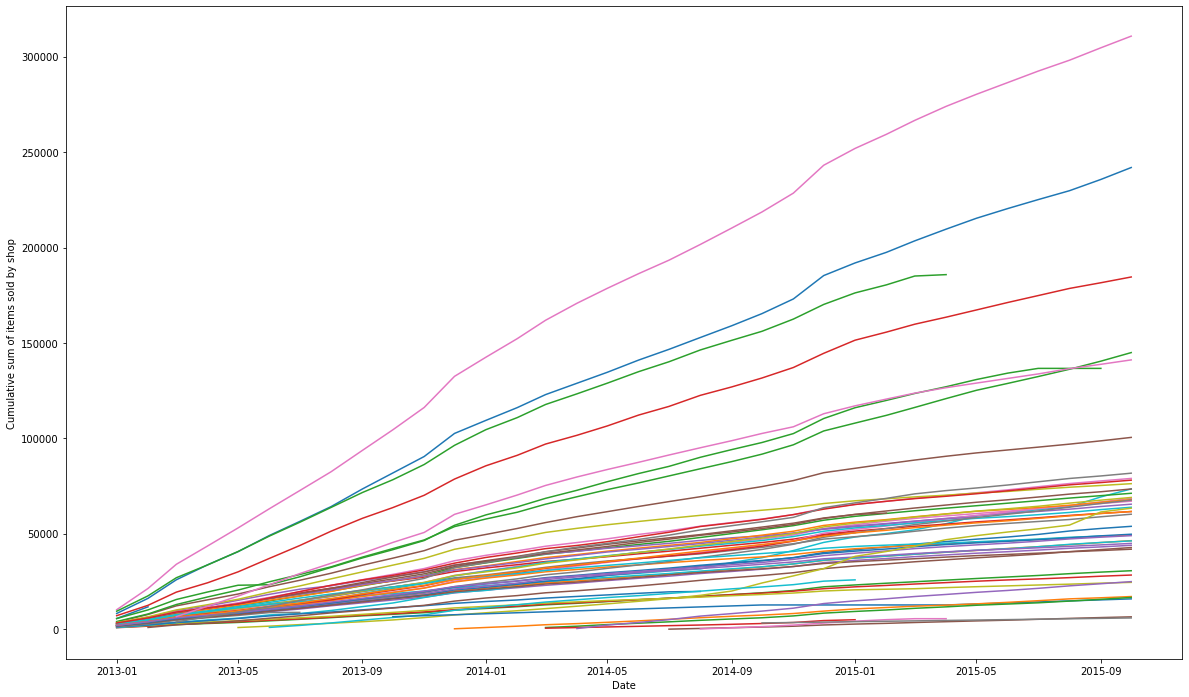

In [95]:
fig, ax = plt.subplots(figsize=(20, 12))
for i in df_shop_cnt_cumsum["shop_id"].unique():
    ax.plot(df_shop_cnt_cumsum.loc[df_shop_cnt_cumsum["shop_id"] == i, "date"], 
            df_shop_cnt_cumsum.loc[df_shop_cnt_cumsum["shop_id"] == i, "item_cnt_month"],
            label=i)
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative sum of items sold by shop")

There are some shops which are probably already closed. On other hand, some were opened after 2013.

Based on two previous plots, we can probably predict 0 for all the items which are not sold anymore and shops that are closed (if they appear in the test set). However, these missing values could be for other reason as well. It'll be probably a good idea to see if these are the only missing values in the data or we have some missing values for another reason as well.

In [96]:
sales_train = sales_train.merge(test, how="left", on=["shop_id", "item_id"])

In [97]:
needed_combinations = pd.DataFrame(list(itertools.product(sales_train_by_month["date"].unique(), test["ID"].unique())),
                                   columns=["date", "ID"])

In [98]:
needed_combinations = needed_combinations.merge(sales_train_by_month, how="left", on=["date", "ID"])

In [99]:
needed_combinations.isnull().sum(axis=0)

date                           0
ID                             0
shop_id                  6682641
item_id                  6682641
mean_item_price          6682641
median_item_price        6682641
item_cnt_month           6682641
item_name                6682641
item_category_id         6682641
item_name_en             6682641
item_category_name       6682641
item_category_name_en    6682641
shop_name                6682641
shop_name_en             6682641
item_cnt_cumsum          6682641
dtype: int64

In [100]:
needed_combinations.shape

(7282800, 15)

In [101]:
needed_combinations.dtypes

date                     datetime64[ns]
ID                                int64
shop_id                         float64
item_id                         float64
mean_item_price                 float32
median_item_price               float32
item_cnt_month                  float64
item_name                        object
item_category_id                float64
item_name_en                     object
item_category_name               object
item_category_name_en            object
shop_name                        object
shop_name_en                     object
item_cnt_cumsum                 float64
dtype: object

In [102]:
needed_combinations["date"] = needed_combinations["date"].dt.date

In [103]:
item_cnt_month_by_item = needed_combinations.pivot_table(values="item_cnt_month", index="item_id", columns="date")

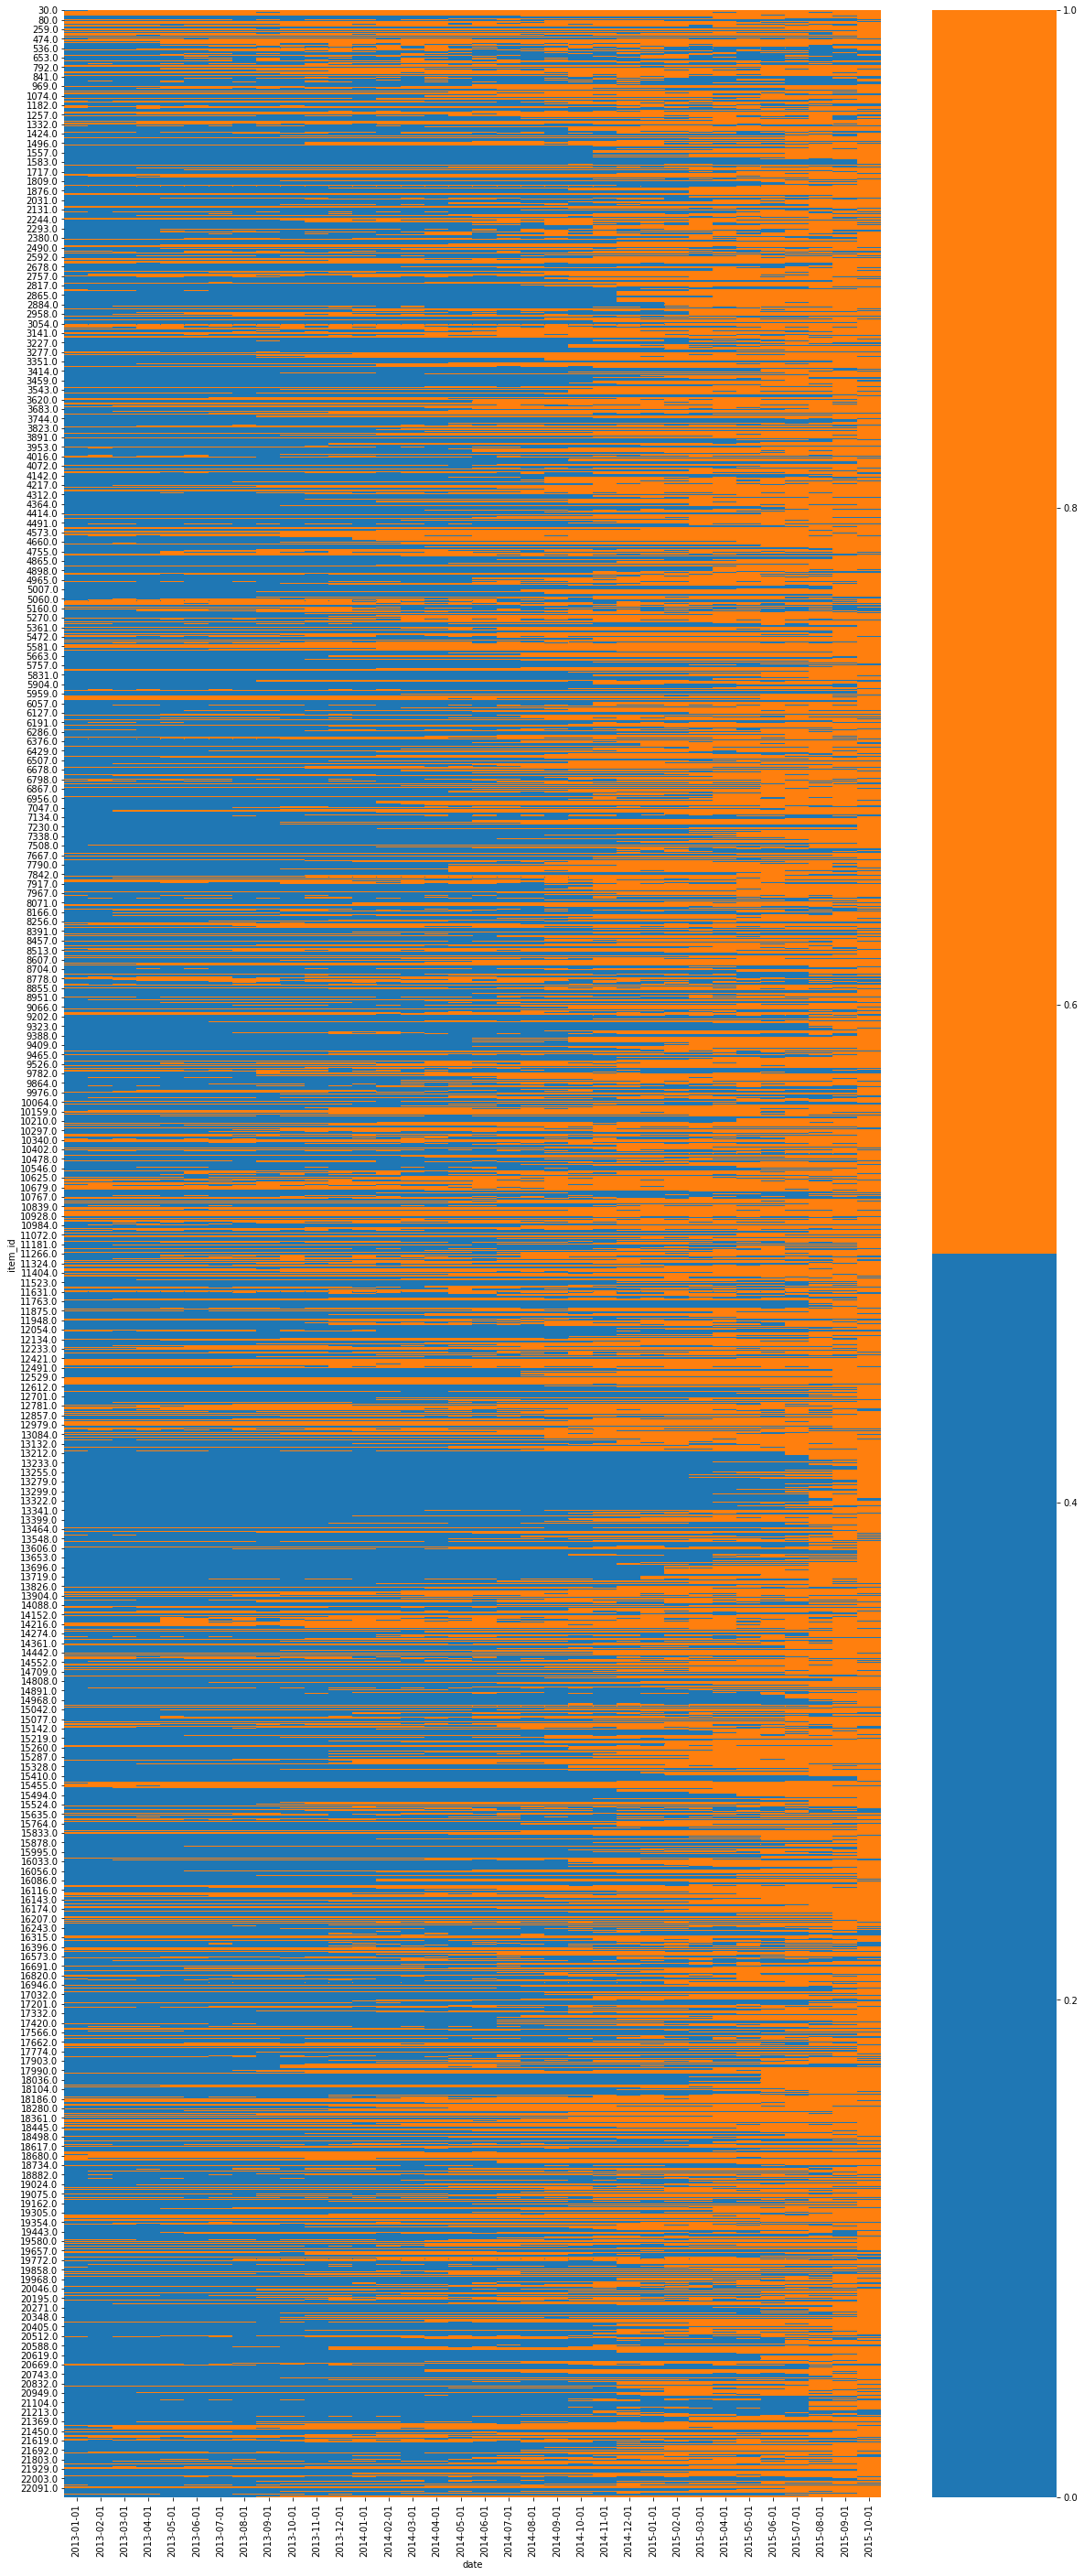

In [104]:
fig, ax = plt.subplots(figsize=(20, 50))
ax = sns.heatmap(item_cnt_month_by_item.notnull(), cmap=sns.color_palette(n_colors=2))

Plenty of missing values with irregular patterns, but it seems that some items were released after the data collection started and some of them are not sold anymore.

In [105]:
item_cnt_month_by_item = item_cnt_month_by_item.loc[item_cnt_month_by_item.apply(lambda row: row.first_valid_index(), axis=1).sort_values().index, :]

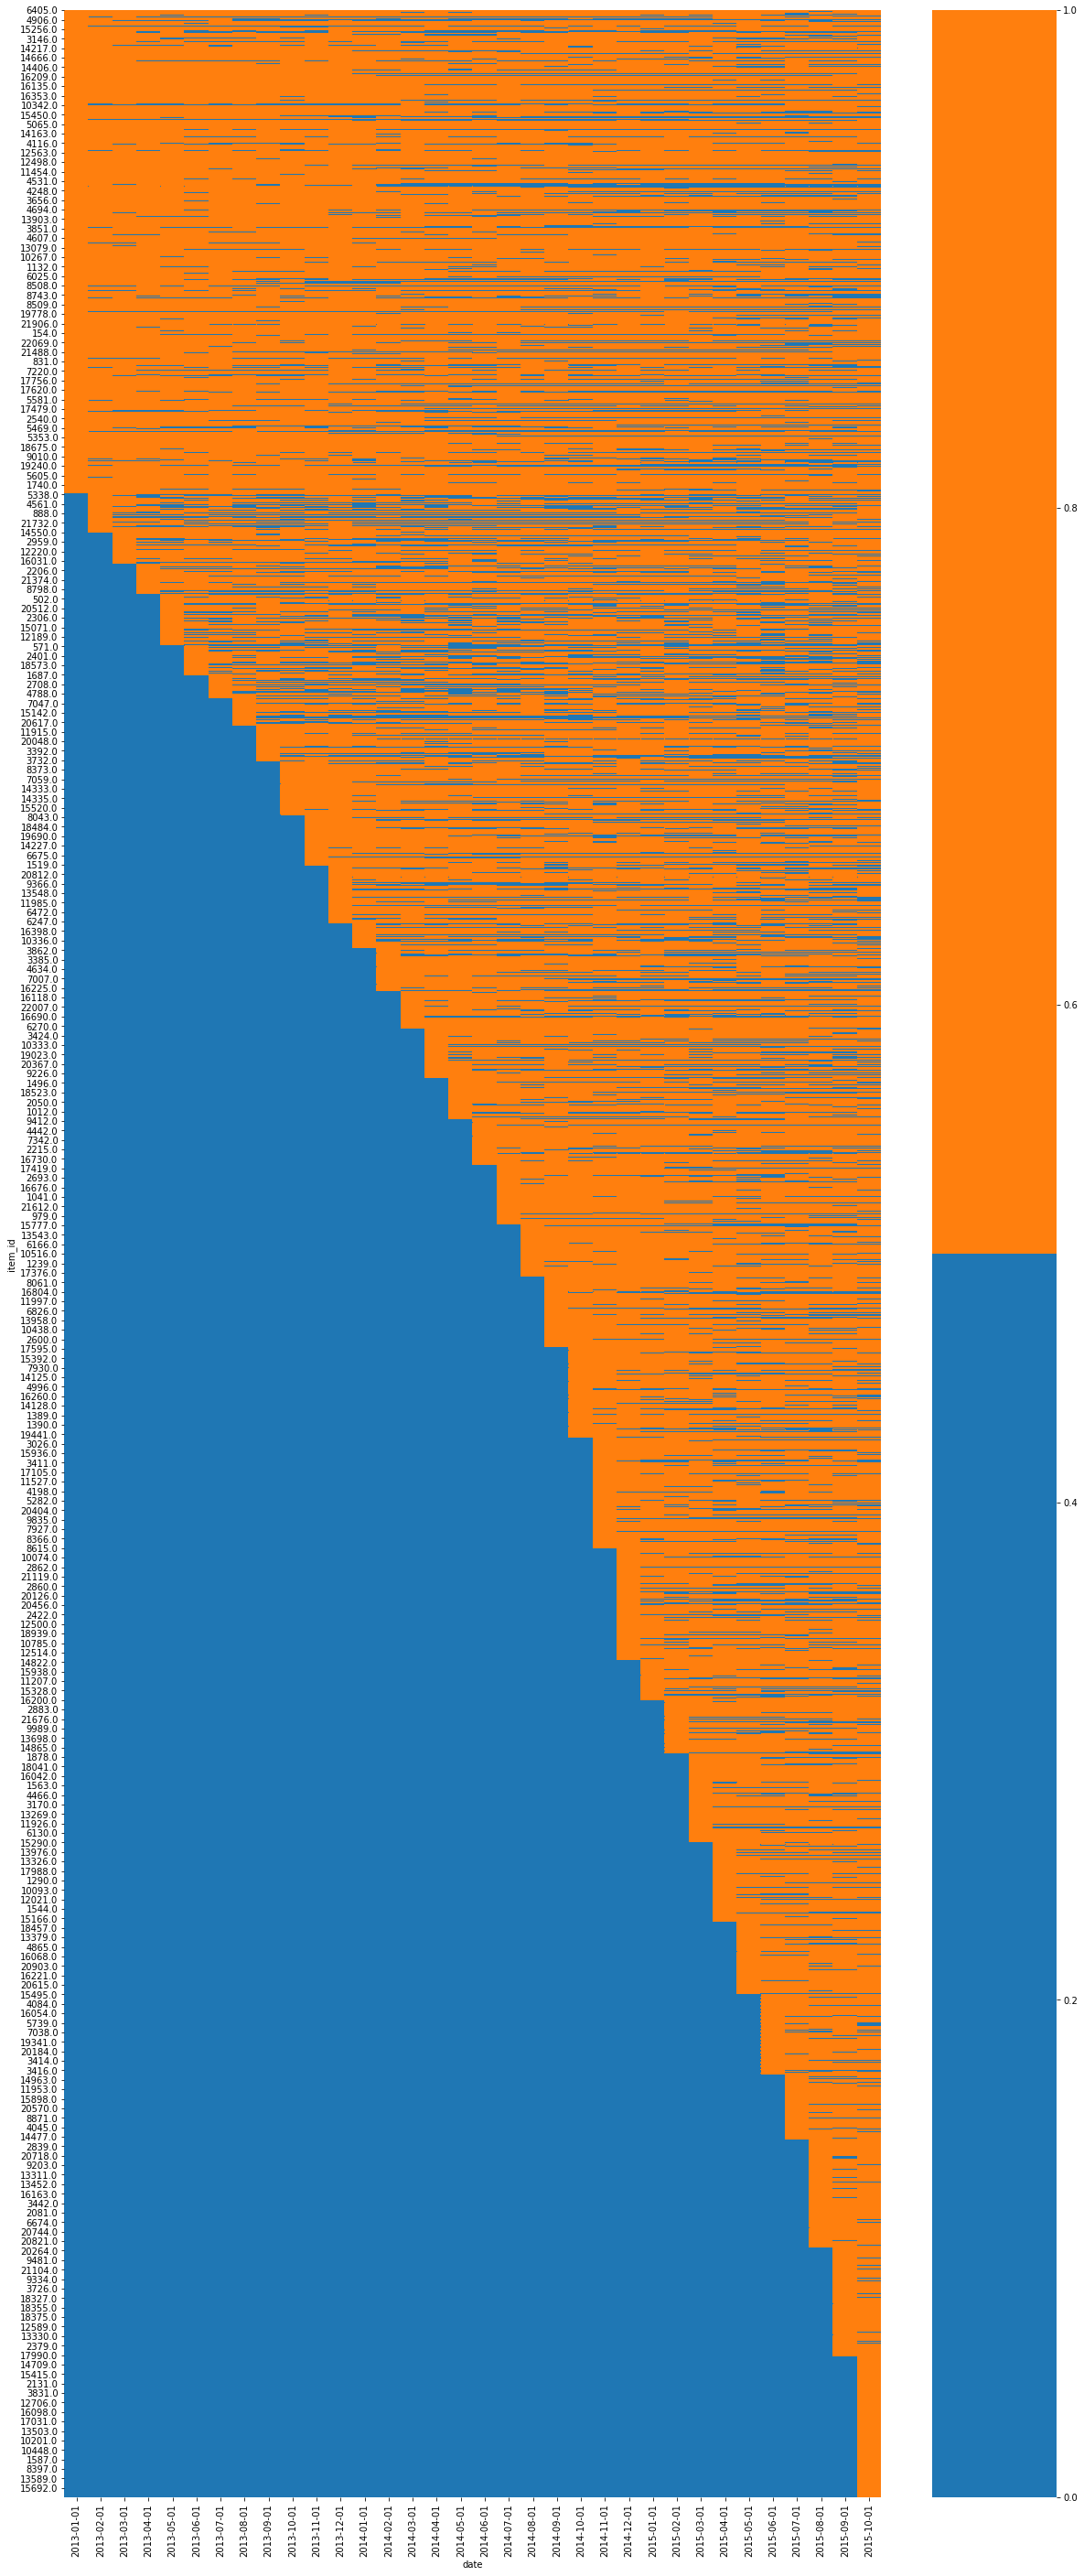

In [106]:
fig, ax = plt.subplots(figsize=(20, 50))
ax = sns.heatmap(item_cnt_month_by_item.notnull(), cmap=sns.color_palette(n_colors=2))

In [107]:
item_cnt_month_by_item = item_cnt_month_by_item.loc[item_cnt_month_by_item.apply(lambda row: row.last_valid_index(), axis=1).sort_values().index]

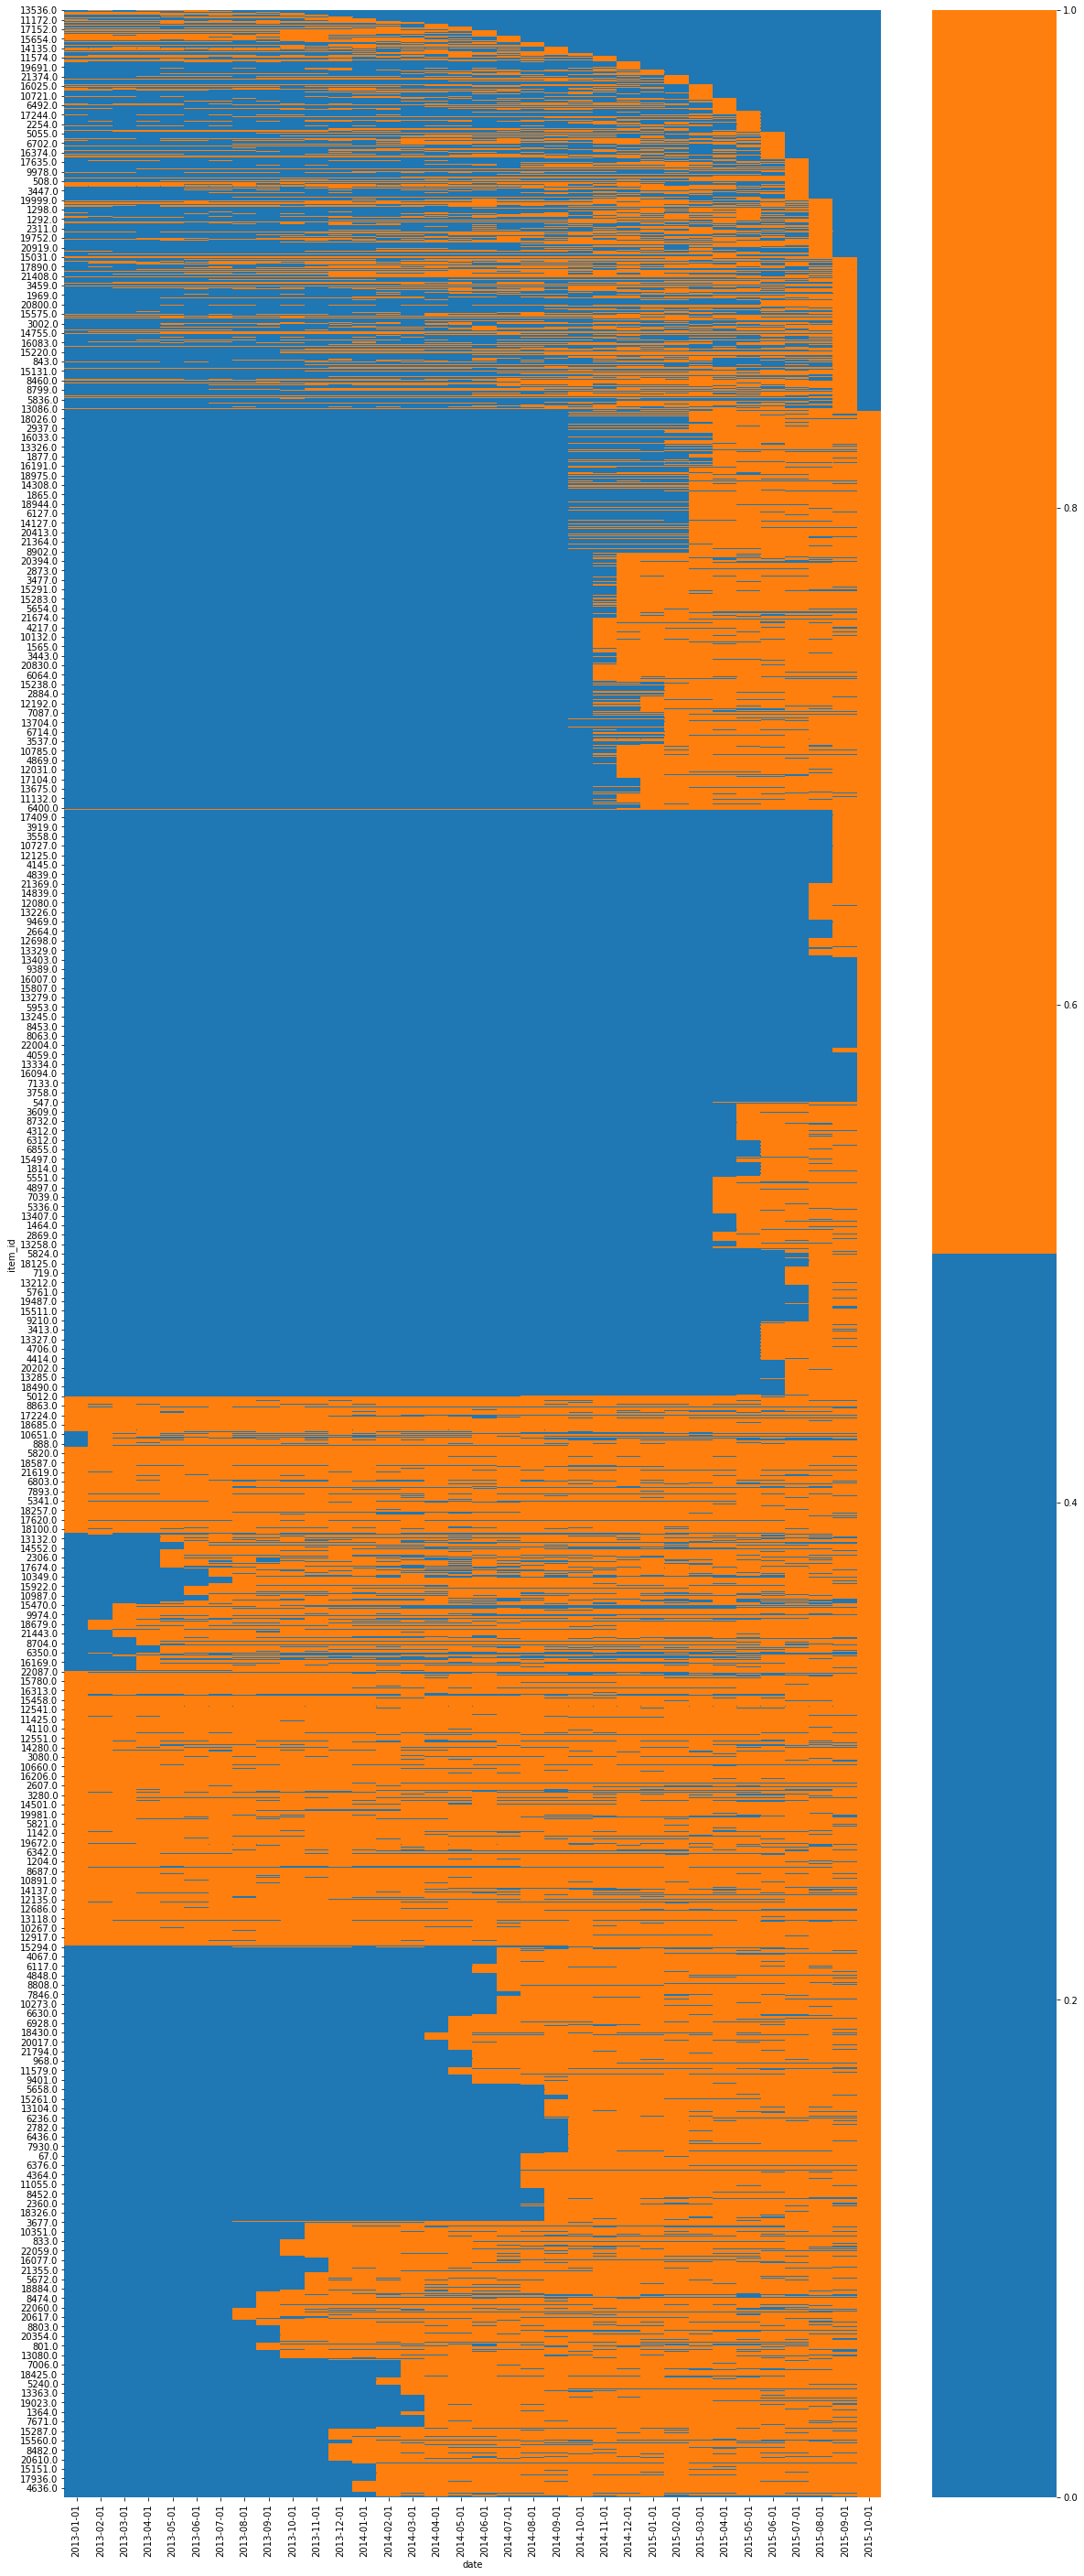

In [108]:
fig, ax = plt.subplots(figsize=(20, 50))
ax = sns.heatmap(item_cnt_month_by_item.notnull(), cmap=sns.color_palette(n_colors=2))

There is some parts of items that is probably not sold anymore. However, some items were sold again even after few months break. This means that predicting 0 for items that seems to be not in sale for a couple of months isn't probably the best solution. However, the features like first valid index and last valid index can be useful.

In [109]:
sales_train_by_month.loc[sales_train_by_month["item_cnt_month"] < 0, "item_cnt_month"].value_counts()

-1     883
-2      26
-4       2
-22      1
-13      1
-6       1
-5       1
Name: item_cnt_month, dtype: int64

In [110]:
sales_train.loc[sales_train["item_cnt_day"] < 0, "item_cnt_day"].value_counts()

-1     7252
-2       78
-3       14
-5        4
-4        3
-6        2
-9        1
-22       1
-16       1
Name: item_cnt_day, dtype: int64

These are probably returned items. We can either remove those negative values (set to 0), but I believe it would create a bias (as if more items are sold than returned the value is positive and those returned items are still present in total value). Probably better to leave them as they are.

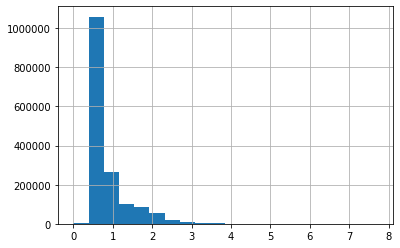

In [111]:
np.log1p(sales_train_by_month.loc[sales_train_by_month["item_cnt_month"] >= 0, "item_cnt_month"]).hist(bins=20)

In [112]:
needed_combinations.groupby("date")["item_cnt_month"].agg(lambda x: x.isnull().sum() / len(x))

../src/read_data.py:1: RuntimeWarning: invalid value encountered in long_scalars
  import pandas as pd


date
2013-01-01    0.963403
2013-02-01    0.961611
2013-03-01    0.954514
2013-04-01    0.959528
2013-05-01    0.958669
2013-06-01    0.955682
2013-07-01    0.952227
2013-08-01    0.949108
2013-09-01    0.951237
2013-10-01    0.947232
2013-11-01    0.942460
2013-12-01    0.922241
2014-01-01    0.933763
2014-02-01    0.935037
2014-03-01    0.928142
2014-04-01    0.931933
2014-05-01    0.926746
2014-06-01    0.920756
2014-07-01    0.916774
2014-08-01    0.907493
2014-09-01    0.916013
2014-10-01    0.907754
2014-11-01    0.895294
2014-12-01    0.853978
2015-01-01    0.879421
2015-02-01    0.886937
2015-03-01    0.882796
2015-04-01    0.894883
2015-05-01    0.891783
2015-06-01    0.886928
2015-07-01    0.876545
2015-08-01    0.864795
2015-09-01    0.876345
2015-10-01    0.866106
Name: item_cnt_month, dtype: float64

# Explore the price

In [113]:
sales_train["item_price"].value_counts()

299.000000     291352
399.000000     242603
149.000000     218432
199.000000     184044
349.000000     101461
                ...  
2155.000000         1
2154.250000         1
291.666656          1
2153.699951         1
511.997498          1
Name: item_price, Length: 19992, dtype: int64

In [114]:
(100 * sales_train["item_price"] % 1).value_counts()

0.000000    2916225
0.500000       2437
0.007812       1487
0.003906       1257
0.999023       1221
             ...   
0.400024          1
0.399414          1
0.824219          1
0.387085          1
0.499969          1
Name: item_price, Length: 340, dtype: int64

In [115]:
((100 * sales_train["item_price"] % 1) > 0).value_counts(normalize=True)

False    0.993316
True     0.006684
Name: item_price, dtype: float64

Over 99% of products has a price which is an integer value, but there are some items with irregular decimals. I believe it may be an indication of some discount applied and therefore, and indication of occasional promotion.

In [116]:
irregular_decimals = (100 * sales_train["item_price"] % 1) > 0

In [117]:
irregular_decimals_dates = sales_train.loc[irregular_decimals, "date"].drop_duplicates()

In [118]:
(irregular_decimals_dates - irregular_decimals_dates.shift(1, fill_value="2012-12-31")).value_counts()

1 days    1034
Name: date, dtype: int64

/home/kuba/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


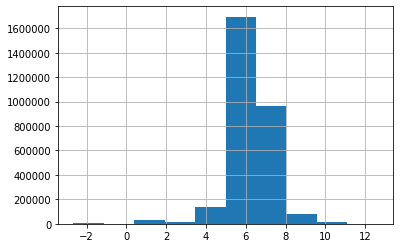

In [119]:
np.log(sales_train["item_price"]).hist()

In [120]:
sales_train.loc[sales_train["item_price"] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_name_en,item_category_name,item_category_name_en,shop_name,shop_name_en,ID
482378,2013-05-15,4,32,2973,-1.0,1,"DmC Devil May Cry [PS3, русские субтитры]",19,"DmC Devil May Cry [PS3, Russian subtitles]",Игры - PS3,Games - PS3,"Москва ТЦ ""Серебряный Дом""","Moscow shopping center ""Silver House""",NaN


Seems like invalid value. We can deal with that later with some imputation method.

In [121]:
sales_train.loc[sales_train["item_id"] == 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_name_en,item_category_name,item_category_name_en,shop_name,shop_name_en,ID
1955734,2014-09-01,20,54,0,58.0,1,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40,! POWER IN glamor (PLAST.) D,Кино - DVD,Movie - DVD,"Химки ТЦ ""Мега""","Khimki TC ""Mega""",NaN


In [122]:
sales_train["item_price"].describe(percentiles=np.arange(0.1, 1, 0.1)).apply(lambda x: format(x, 'g'))

count    2.93585e+06
mean         890.605
std          1726.46
min               -1
10%              149
20%              199
30%              299
40%              349
50%              399
60%              599
70%              799
80%             1199
90%             1999
max           307980
Name: item_price, dtype: object

In [123]:
sales_train.sort_values("item_price", ascending=False).head(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_name_en,item_category_name,item_category_name_en,shop_name,shop_name_en,ID
1162675,2013-12-13,11,12,6066,307980.0,1,Radmin 3 - 522 лиц.,75,Radmin 3 - 522 лиц.,Программы - Для дома и офиса,Program - For home and office,Интернет-магазин ЧС,Shop Online Emergencies,NaN
889806,2013-09-17,8,12,11365,59200.0,1,Доставка (EMS),9,Shipping (EMS),Доставка товара,Delivery of goods,Интернет-магазин ЧС,Shop Online Emergencies,37350.0
1514069,2014-03-20,14,25,13199,50999.0,1,Коллекционные шахматы (Властелин Колец),69,Collector chess (Rings),Подарки - Сувениры,Gifts - Souvenirs,"Москва ТРК ""Атриум""","Moscow TRC ""Atrium""",NaN
2404539,2015-01-29,24,12,7241,49782.0,1,UserGate Proxy & Firewall 6.X с модулем фильтр...,75,UserGate Proxy & Firewall 6.X filtration modul...,Программы - Для дома и офиса,Program - For home and office,Интернет-магазин ЧС,Shop Online Emergencies,NaN
2915393,2015-10-20,33,3,13403,42990.0,1,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",Игровые консоли - XBOX ONE,Game consoles - XBOX ONE,"Балашиха ТРК ""Октябрь-Киномир""","Balashikha TRC ""October-Kinomir""",20306.0
2920904,2015-10-23,33,42,13403,42990.0,1,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",Игровые консоли - XBOX ONE,Game consoles - XBOX ONE,"СПб ТК ""Невский Центр""","St. Petersburg TK ""Nevsky Center""",107006.0
2930107,2015-10-29,33,12,13403,42990.0,1,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",Игровые консоли - XBOX ONE,Game consoles - XBOX ONE,Интернет-магазин ЧС,Shop Online Emergencies,40706.0
2915747,2015-10-20,33,22,13403,42990.0,1,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",Игровые консоли - XBOX ONE,Game consoles - XBOX ONE,Москва Магазин С21,Moscow Shop C21,66206.0
1003401,2013-10-24,9,12,7238,42000.0,1,UserGate Proxy & Firewall 6.X до 100 сессий,75,UserGate Proxy & Firewall 6.X до 100 сессий,Программы - Для дома и офиса,Program - For home and office,Интернет-магазин ЧС,Shop Online Emergencies,NaN
2915532,2015-10-20,33,12,13403,41990.0,1,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",Игровые консоли - XBOX ONE,Game consoles - XBOX ONE,Интернет-магазин ЧС,Shop Online Emergencies,40706.0


The most expensive item was Radmin3 license sold probably in a package for 522 people. The second top item with respect to price was a delivery, which is a little bit weird, but feasible in case of an overseas delivery of the large order. Other most expensive items were either game consoles or highly-technical software.

In [124]:
item_price_stats = sales_train.groupby("item_id") \
    .agg({"item_price": [np.nanstd, np.mean, np.median, "count"], "shop_id": "nunique"})
item_price_stats.rename({"nunique": "n_shops"}, axis=1, inplace=True)
item_price_stats = item_price_stats.T.reset_index(level=0, drop=True).T
item_price_stats["dispersion"] = item_price_stats["nanstd"] ** 2 / item_price_stats["mean"]
item_price_stats.sort_values("dispersion", ascending=False).head(30)

,nanstd,mean,median,count,n_shops,dispersion
item_id,,,,,,
11365,4119.496582,1887.565430,1203.750000,242.0,1.0,8990.550379
13477,5368.354492,10194.000000,10194.000000,2.0,2.0,2827.077688
16854,1612.658325,1592.333374,349.000000,15.0,10.0,1633.242709
11369,1234.943359,1007.965454,669.000000,417.0,1.0,1513.033105
3875,1837.770508,2298.500000,2298.500000,2.0,2.0,1469.393274
14170,5813.875488,23157.000000,24900.000000,3.0,3.0,1459.651431
11370,1084.955933,822.165955,518.333313,624.0,1.0,1431.741815
20666,3181.980469,7749.000000,7749.000000,2.0,2.0,1306.620171
20724,1625.492798,2252.000000,2399.000000,3.0,2.0,1173.280122


In [125]:
sales_train.groupby("item_id")["shop_id"].nunique()

item_id
0         1
1         1
2         1
3         1
4         1
         ..
22165     1
22166     1
22167    49
22168     5
22169     1
Name: shop_id, Length: 21807, dtype: int64

There are a lot of items with really large dispersion from the mean value. Let's inspect few of them.

In [126]:
items[items["item_id"] == 11365]

,item_name,item_id,item_category_id,item_name_en
11365,Доставка (EMS),11365,9,Shipping (EMS)


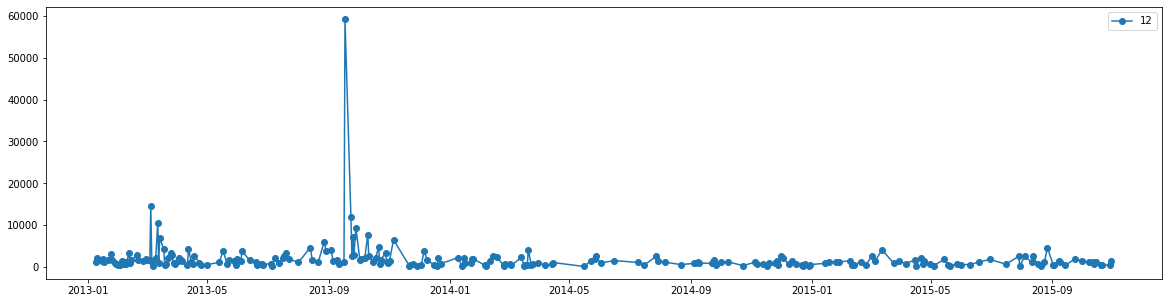

In [127]:
fig, ax = plt.subplots(figsize=(20, 5))
for id, shop_df in sales_train.sort_values("date").loc[sales_train["item_id"] == 11365].groupby('shop_id'):
    ax.plot(shop_df["date"],
            shop_df["item_price"], 
            "o-", label=id)
ax.legend()

This is certainly weird distribution of item price. There's few outliers so median value should be probably used if we want to aggregate values of `item_price`.

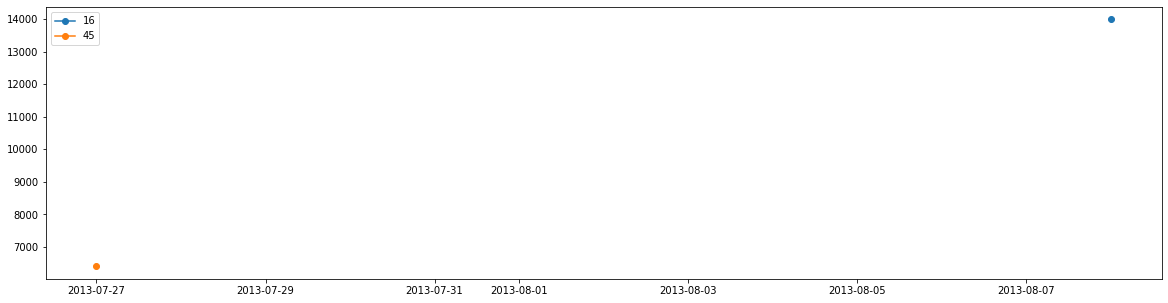

In [128]:
fig, ax = plt.subplots(figsize=(20, 5))
for id, shop_df in sales_train.sort_values("date").loc[sales_train["item_id"] == 13477].groupby('shop_id'):
    ax.plot(shop_df["date"],
            shop_df["item_price"], 
            "o-", label=id)
ax.legend()

In [129]:
sales_train.sort_values("date").loc[sales_train["item_id"] == 13477]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_name_en,item_category_name,item_category_name_en,shop_name,shop_name_en,ID
718391,2013-07-27,6,45,13477,6398.0,1,Комплект «Sony PS3 (320 Gb) (CECH-3008B)» + иг...,11,Комплект «Sony PS3 (320 Gb) (CECH-3008B)» + иг...,Игровые консоли - PS3,Game consoles - PS3,"Самара ТЦ ""ПаркХаус""","Samara TC ""Parkhaus""",NaN
756191,2013-08-08,7,16,13477,13990.0,-1,Комплект «Sony PS3 (320 Gb) (CECH-3008B)» + иг...,11,Комплект «Sony PS3 (320 Gb) (CECH-3008B)» + иг...,Игровые консоли - PS3,Game consoles - PS3,"Коломна ТЦ ""Рио""","Kolomna TC ""Rio""",NaN


It's unlikely that the price was nearly doubled in less than two weaks, but maybe there were some promotion applied. 

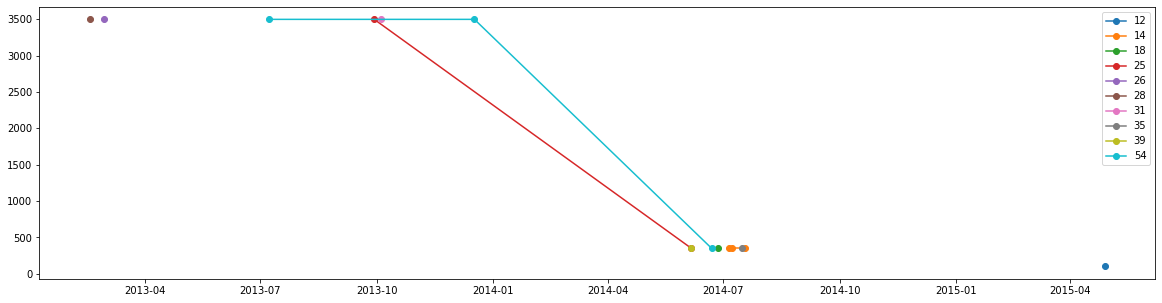

In [130]:
fig, ax = plt.subplots(figsize=(20, 5))
for id, shop_df in sales_train.sort_values("date").loc[sales_train["item_id"] == 16854].groupby('shop_id'):
    ax.plot(shop_df["date"],
            shop_df["item_price"], 
            "o-", label=id)
ax.legend()

Price of the item 16854 varies not only accross shops but also within the same shops.

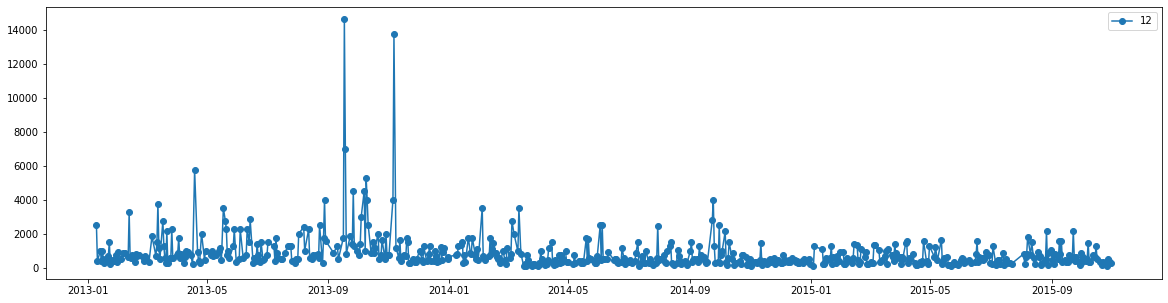

In [131]:
fig, ax = plt.subplots(figsize=(20, 5))
for id, shop_df in sales_train.sort_values("date").loc[sales_train["item_id"] == 11370].groupby('shop_id'):
    ax.plot(shop_df["date"],
            shop_df["item_price"], 
            "o-", label=id)
ax.legend()

As with first item 11365, we observe outliers in price.

In [132]:
sales_train.loc[sales_train["item_id"] == 11370, "shop_id"].drop_duplicates()

43089    12
Name: shop_id, dtype: int8